In [1]:
import numpy as np
import queue
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
def getNAttacks(state):
    attacks = 0
    n = len(state)
    for i in range(0,n):
        X = state[i]
        for j in range(i+1,n):
            Y = state[j]
            #print("Attacks: "+str(attacks)+" i - j = "+str(i-j)+" X - Y = "+str(X-Y))
            if(X-Y == 0):
                attacks+=2
            if(abs(i-j) == abs(X-Y)):
                attacks+=2
    return attacks

#Receives a list that represents the state: [n1,n2,...] where n1 != n2!= ...
def goaltest(state,goal):
    attacks = getNAttacks(state)
    
    print("You got "+str(attacks)+" out of "+str(goal)+".\nYou "+("didn't ","")[attacks==goal]+"satisfy the goal.")
    return attacks == goal

In [3]:
def sortOffspring(offspring):
    state_attacks = [[x,getNAttacks(offspring[x])] for x in range(0,len(offspring))]
    sorted_by_attacks = sorted(state_attacks, key = lambda x: x[1])
    sorted_states = [offspring[sorted_by_attacks[x][0]] for x in range(0,len(sorted_by_attacks))]
    return sorted_states

#Expands the actual node, returns a list of states
def expand(state):
    expanded = []
    n = len(state)
    for i in range(0,n):
        temporal = [0]*n
        temporal[i] = 1
        expanded_value = list(np.add(temporal,state))
        #Validate that it can't overextend the range
        #And that it has unique values
        #if any(k > n for k in expanded_value) and not (len(set(expanded_value)) == n):
        #    continue
        expanded.append(expanded_value)
    return expanded

In [4]:
def addtoQueue(queue_,list_of_lists):
    for l in list_of_lists:
        queue_.put(l)

def printQueue(queue_,elem_limit):
    queue_= list(queue_.queue)
    if len(queue_)<elem_limit:
        print("frontier = "+str(queue_))
def printBoard(arr_solution):
    if arr_solution != []:
        size = len(arr_solution)

        chessboard = np.zeros((size,size))
        chessboard[1::2,0::2] = 1
        chessboard[0::2,1::2] = 1

        plt.imshow(chessboard, cmap='binary')
        #print(arr_solution)
        for i in range(0,len(arr_solution)):
            j = arr_solution[i]-1
            plt.text(j, i, '♕', fontsize=20, ha='center', va='center', color='black' if (i - j) % 2 == 0 else 'white')
        plt.show()


In [6]:
# MAIN ALGORITHM
cost=1
arr_solution = []

def VS(frontier,goal):
    global cost, arr_solution
    act_element = frontier.get()
    print("\n"+str(cost)+". ======== "+str(act_element)+" ========")
    if goaltest(act_element,goal):
        print("The BFS is "+str(act_element))
        arr_solution = act_element
        return
    
    offspring = expand(act_element)
    offspring = sortOffspring(offspring)
    
    addtoQueue(frontier,offspring)

    cost+=1
    VS(frontier,goal)

In [7]:
front = queue.Queue()
board = [1]*5
print(board)
front.put(board)
VS(front,0)
print(str(cost)+" iterations were done.")
cost = 0
front.queue.clear()

[1, 1, 1, 1, 1]

1. ======== [1, 1, 1, 1, 1] ========
You got 20 out of 0.
You didn't satisfy the goal.

2. ======== [2, 1, 1, 1, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

3. ======== [1, 1, 1, 1, 2] ========
You got 14 out of 0.
You didn't satisfy the goal.

4. ======== [1, 2, 1, 1, 1] ========
You got 16 out of 0.
You didn't satisfy the goal.

5. ======== [1, 1, 2, 1, 1] ========
You got 16 out of 0.
You didn't satisfy the goal.

6. ======== [1, 1, 1, 2, 1] ========
You got 16 out of 0.
You didn't satisfy the goal.

7. ======== [2, 2, 1, 1, 1] ========
You got 10 out of 0.
You didn't satisfy the goal.

8. ======== [2, 1, 1, 1, 2] ========
You got 12 out of 0.
You didn't satisfy the goal.

9. ======== [3, 1, 1, 1, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

10. ======== [2, 1, 2, 1, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

11. ======== [2, 1, 1, 2, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

12. ======== 

You didn't satisfy the goal.

439. ======== [2, 3, 2, 1, 1] ========
You got 12 out of 0.
You didn't satisfy the goal.

440. ======== [1, 3, 2, 1, 2] ========
You got 12 out of 0.
You didn't satisfy the goal.

441. ======== [1, 3, 3, 1, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

442. ======== [1, 3, 2, 2, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

443. ======== [1, 2, 2, 3, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

444. ======== [2, 2, 2, 2, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

445. ======== [1, 2, 2, 2, 2] ========
You got 14 out of 0.
You didn't satisfy the goal.

446. ======== [1, 2, 3, 2, 1] ========
You got 16 out of 0.
You didn't satisfy the goal.

447. ======== [2, 2, 3, 1, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

448. ======== [1, 2, 4, 1, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

449. ======== [1, 2, 3, 1, 2] ========
You got 12 out of 0.
You didn't sat

967. ======== [4, 2, 1, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

968. ======== [3, 3, 1, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

969. ======== [3, 2, 2, 1, 2] ========
You got 12 out of 0.
You didn't satisfy the goal.

970. ======== [3, 2, 1, 1, 3] ========
You got 12 out of 0.
You didn't satisfy the goal.

971. ======== [3, 2, 1, 2, 2] ========
You got 14 out of 0.
You didn't satisfy the goal.

972. ======== [2, 2, 2, 1, 3] ========
You got 8 out of 0.
You didn't satisfy the goal.

973. ======== [2, 2, 3, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

974. ======== [3, 2, 2, 1, 2] ========
You got 12 out of 0.
You didn't satisfy the goal.

975. ======== [2, 3, 2, 1, 2] ========
You got 16 out of 0.
You didn't satisfy the goal.

976. ======== [2, 2, 2, 2, 2] ========
You got 20 out of 0.
You didn't satisfy the goal.

977. ======== [2, 3, 1, 2, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

978. ======

1397. ======== [2, 2, 2, 3, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

1398. ======== [3, 2, 2, 2, 1] ========
You got 10 out of 0.
You didn't satisfy the goal.

1399. ======== [2, 3, 2, 2, 1] ========
You got 12 out of 0.
You didn't satisfy the goal.

1400. ======== [2, 2, 3, 2, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

1401. ======== [2, 2, 2, 2, 2] ========
You got 20 out of 0.
You didn't satisfy the goal.

1402. ======== [3, 1, 2, 2, 2] ========
You got 8 out of 0.
You didn't satisfy the goal.

1403. ======== [2, 1, 3, 2, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

1404. ======== [2, 1, 2, 2, 3] ========
You got 12 out of 0.
You didn't satisfy the goal.

1405. ======== [2, 1, 2, 3, 2] ========
You got 16 out of 0.
You didn't satisfy the goal.

1406. ======== [2, 2, 2, 2, 2] ========
You got 20 out of 0.
You didn't satisfy the goal.

1407. ======== [1, 1, 4, 2, 2] ========
You got 6 out of 0.
You didn't satisfy the goal.

14

1861. ======== [1, 2, 2, 1, 4] ========
You got 10 out of 0.
You didn't satisfy the goal.

1862. ======== [1, 4, 2, 1, 2] ========
You got 8 out of 0.
You didn't satisfy the goal.

1863. ======== [1, 3, 2, 2, 2] ========
You got 8 out of 0.
You didn't satisfy the goal.

1864. ======== [1, 3, 3, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

1865. ======== [1, 3, 2, 1, 3] ========
You got 10 out of 0.
You didn't satisfy the goal.

1866. ======== [2, 3, 2, 1, 2] ========
You got 16 out of 0.
You didn't satisfy the goal.

1867. ======== [2, 2, 3, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

1868. ======== [1, 3, 3, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

1869. ======== [1, 2, 4, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

1870. ======== [1, 2, 3, 1, 3] ========
You got 10 out of 0.
You didn't satisfy the goal.

1871. ======== [1, 2, 3, 2, 2] ========
You got 14 out of 0.
You didn't satisfy the goal.

1


2310. ======== [2, 3, 1, 2, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

2311. ======== [1, 3, 1, 2, 3] ========
You got 10 out of 0.
You didn't satisfy the goal.

2312. ======== [1, 3, 2, 3, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

2313. ======== [1, 3, 2, 2, 2] ========
You got 8 out of 0.
You didn't satisfy the goal.

2314. ======== [1, 4, 2, 2, 1] ========
You got 10 out of 0.
You didn't satisfy the goal.

2315. ======== [2, 3, 2, 2, 1] ========
You got 12 out of 0.
You didn't satisfy the goal.

2316. ======== [1, 3, 3, 2, 1] ========
You got 12 out of 0.
You didn't satisfy the goal.

2317. ======== [2, 3, 1, 3, 1] ========
You got 6 out of 0.
You didn't satisfy the goal.

2318. ======== [1, 3, 1, 3, 2] ========
You got 6 out of 0.
You didn't satisfy the goal.

2319. ======== [1, 4, 1, 3, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

2320. ======== [1, 3, 2, 3, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

2321

You got 14 out of 0.
You didn't satisfy the goal.

2732. ======== [2, 2, 4, 1, 1] ========
You got 6 out of 0.
You didn't satisfy the goal.

2733. ======== [3, 2, 3, 1, 1] ========
You got 10 out of 0.
You didn't satisfy the goal.

2734. ======== [2, 3, 3, 1, 1] ========
You got 10 out of 0.
You didn't satisfy the goal.

2735. ======== [2, 2, 3, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

2736. ======== [2, 2, 3, 2, 1] ========
You got 14 out of 0.
You didn't satisfy the goal.

2737. ======== [2, 2, 4, 1, 1] ========
You got 6 out of 0.
You didn't satisfy the goal.

2738. ======== [1, 2, 5, 1, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

2739. ======== [1, 2, 4, 2, 1] ========
You got 8 out of 0.
You didn't satisfy the goal.

2740. ======== [1, 3, 4, 1, 1] ========
You got 10 out of 0.
You didn't satisfy the goal.

2741. ======== [1, 2, 4, 1, 2] ========
You got 10 out of 0.
You didn't satisfy the goal.

2742. ======== [2, 2, 3, 1, 2] ========
You

RecursionError: maximum recursion depth exceeded in comparison

[2, 4, 1, 3]


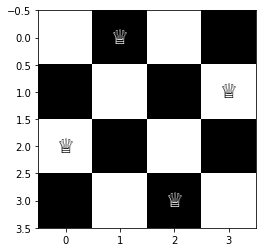

END


In [18]:
printBoard(arr_solution)
arr_solution = []
print("END")

##  Testing of the sortOffspring Function

offspring = [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2], [2, 2, 1, 1]]
Get [id,#attacks] = [[0, 12], [1, 8], [2, 10], [3, 10], [4, 8], [5, 6]]
Sort by #attacks = [[5, 6], [1, 8], [4, 8], [2, 10], [3, 10], [0, 12]]
Return back to original states = [[2, 2, 1, 1], [2, 1, 1, 1], [1, 1, 1, 2], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 1]]


[[2, 2, 1, 1],
 [2, 1, 1, 1],
 [1, 1, 1, 2],
 [1, 2, 1, 1],
 [1, 1, 2, 1],
 [1, 1, 1, 1]]